In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import glob
import scipy

%run ../util.ipynb
%run ../model_pipeline/RidgeLSRegression.ipynb
%run ../model_pipeline/LassoLSRegression.ipynb

## Import Data Sets

In [14]:
# Raw Data
raw_X = []
raw_Y = []
for img_path in glob.glob('../raw_data/*.jpg'):
    # Although scipy.misc.imresize is deprecated, leave it in since Matt can't use skimage.transform.resize.
    raw_X.append(scipy.misc.imresize(cv2.imread(img_path),0.25))
    y = img_path[-11:-7].replace('p', '.')
    raw_Y.append(y)

raw_X = np.asarray(raw_X)
raw_X.shape = [raw_X.shape[0], raw_X.shape[1]*raw_X.shape[2]*raw_X.shape[3]]
raw_Y = np.array(raw_Y).astype('float')[:, np.newaxis] # makes shape (90, 1)

raw_XScaler = StandardScaler()
raw_YScaler = StandardScaler()

raw_X = raw_XScaler.fit_transform(raw_X)
raw_Y = raw_YScaler.fit_transform(raw_Y)

c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# Masked Data
masked_X = []
masked_Y = []
for img_path in glob.glob('../masked_data/*.jpg'):
    masked_X.append(scipy.misc.imresize(cv2.imread(img_path),[333, 250, 3]))
    y = img_path[-11:-7].replace('p', '.')
    masked_Y.append(y)
masked_X = np.asarray(masked_X)
masked_X.shape = [masked_X.shape[0], masked_X.shape[1]*masked_X.shape[2]*masked_X.shape[3]]
masked_Y = np.array(masked_Y).astype('float')[:, np.newaxis] # makes shape (90, 1)

masked_XScaler = StandardScaler()
masked_YScaler = StandardScaler()

masked_X = masked_XScaler.fit_transform(masked_X)
masked_Y = masked_YScaler.fit_transform(masked_Y)

c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """
c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# Color Extracted Data
color_extracted_X = np.load("../data_matrices/X.npy")
color_extracted_Y = np.load("../data_matrices/Y.npy")

color_extracted_XScaler = StandardScaler()
color_extracted_YScaler = StandardScaler()

color_extracted_X = color_extracted_XScaler.fit_transform(color_extracted_X)
color_extracted_Y = color_extracted_YScaler.fit_transform(color_extracted_Y)

## Ridge Regression

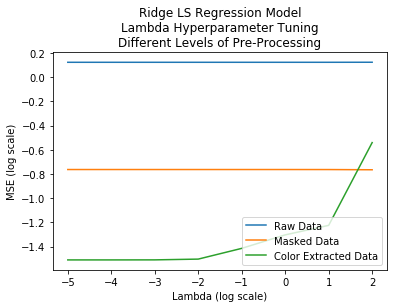

In [23]:
for X, Y, YScaler in [[raw_X, raw_Y, raw_YScaler], [masked_X, masked_Y, masked_YScaler], [color_extracted_X, color_extracted_Y, color_extracted_YScaler]]:
    test_errors = []
    lmdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
    for l in lmdas:
        ridge_m = RidgeLSRegressionModel(l)
        test_errors += [computeTestError(ridge_m, X, Y, YScaler)]
    plt.plot(np.log10(lmdas), np.log10(test_errors))
plt.legend(['Raw Data', 'Masked Data', 'Color Extracted Data'])
plt.xlabel('Lambda (log scale)')
plt.ylabel('MSE (log scale)')
plt.title('Ridge LS Regression Model\nLambda Hyperparameter Tuning\nDifferent Levels of Pre-Processing')
plt.show()

## Lasso Regression

c:\users\matthew\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


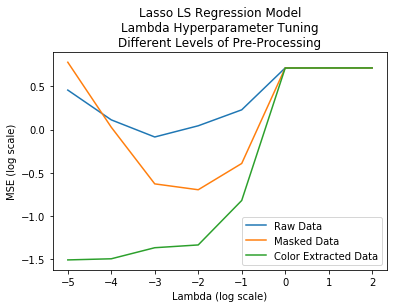

In [24]:
for X, Y, YScaler in [[raw_X, raw_Y, raw_YScaler], [masked_X, masked_Y, masked_YScaler], [color_extracted_X, color_extracted_Y, color_extracted_YScaler]]:
    test_errors = []
    lmdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
    for l in lmdas:
        lasso_m = LassoLSRegressionModel(l)
        test_errors += [computeTestError(lasso_m, X, Y, YScaler)]
    plt.plot(np.log10(lmdas), np.log10(test_errors))
plt.legend(['Raw Data', 'Masked Data', 'Color Extracted Data'])
plt.xlabel('Lambda (log scale)')
plt.ylabel('MSE (log scale)')
plt.title('Lasso LS Regression Model\nLambda Hyperparameter Tuning\nDifferent Levels of Pre-Processing')
plt.show()